<a href="https://colab.research.google.com/github/IlhomJabborov/Real-estate-prices-in-Tashkent-Uzbekistan/blob/main/RealEstatePricesTashkent(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
The dataset contains following columns:
address - ko'chmas mulkning taxminiy manzili
district - ko'chmas mulk joylashgan tuman
rooms - xonalar soni
size - birlikning umumiy hajmi kvadrat metrda
level - birlik qaysi darajada joylashgan
max_levels - binoning maksimal darajalari
price - price in USD
lat - kenglik
lng - uzunlik
'''

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
! unzip "/content/archive (1).zip"

Archive:  /content/archive (1).zip
replace uybor.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
df=pd.read_excel("/content/uybor.xlsx")

In [3]:
df.head()

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [5]:
df.shape

(7421, 9)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,7421.0,2.619728,1.076887,1.000000,2.000000,3.000000,3.000000,10.000000
size,7421.0,73.150726,36.999670,14.000000,50.000000,65.000000,85.000000,456.000000
level,7421.0,3.699367,2.239028,1.000000,2.000000,3.000000,5.000000,19.000000
max_levels,7421.0,6.031397,2.607673,1.000000,4.000000,5.000000,9.000000,25.000000
price,7421.0,59117.618919,46701.090308,10500.000000,35000.000000,46500.000000,66847.000000,800000.000000
lat,7421.0,41.303620,0.033771,41.186375,41.281265,41.296388,41.324956,41.424522
lng,7421.0,69.256615,0.059061,69.148915,69.205802,69.260189,69.293713,69.588687


In [7]:
df.isnull().sum()

address       0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
lat           0
lng           0
dtype: int64

In [8]:
df.duplicated().sum()

696

In [9]:
# drop dublicate
df = df.drop_duplicates()

In [10]:
df['district'].value_counts()

district
Chilonzor        1476
Mirzo Ulugbek    1201
Yunusobod         810
Uchtepa           793
Mirobod           696
Yakkasaroy        551
Yashnobod         441
Shayhontohur      340
Olmzor            248
Sergeli           148
Yangihayot         13
Bektemir            8
Name: count, dtype: int64

In [11]:
df2 = df.drop(columns=['address','district'])

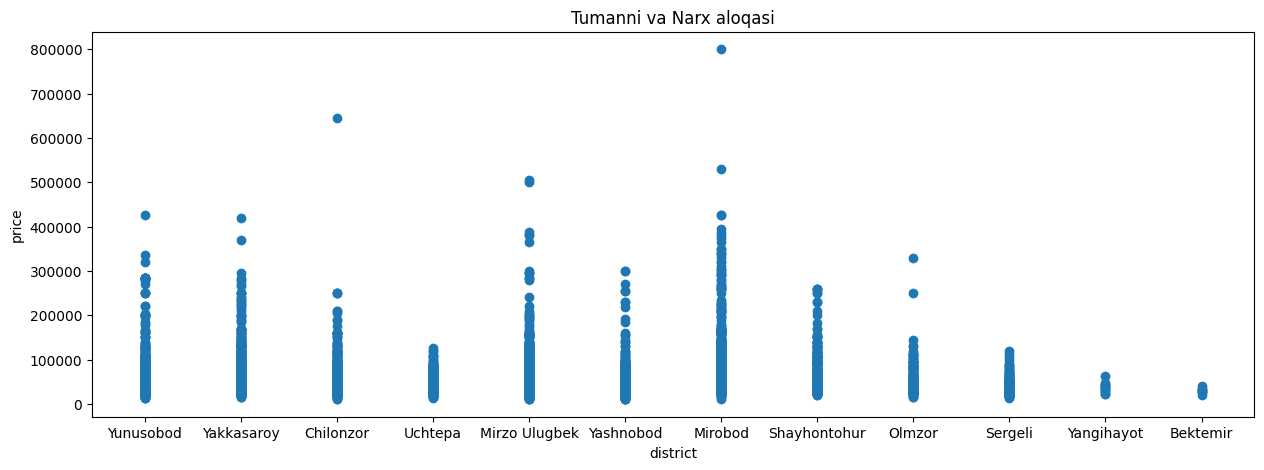

*****************************************************************


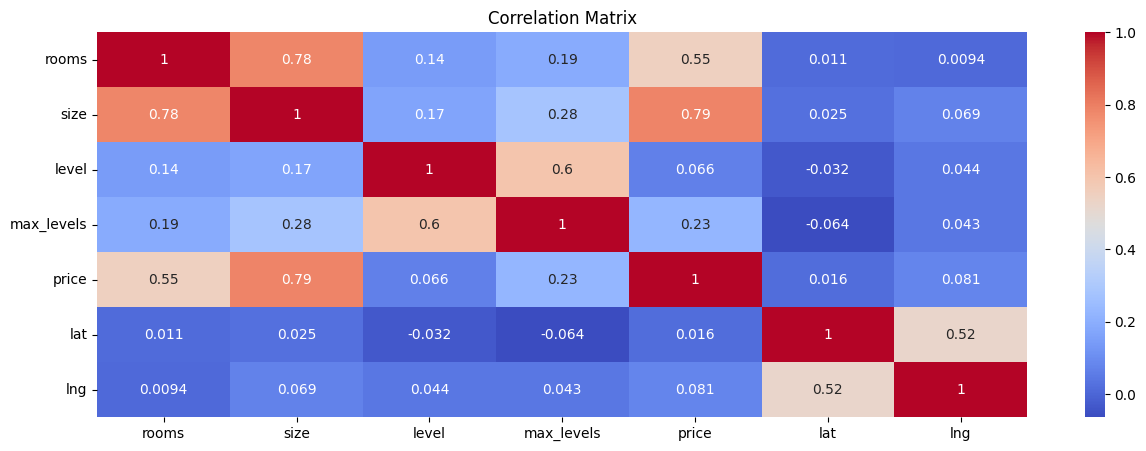

In [12]:
#Bivariate Analysis:

# Scatter plot
plt.figure(figsize=(15,5))
plt.scatter(df['district'], df['price'])
plt.xlabel('district')
plt.ylabel('price')
plt.title('Tumanni va Narx aloqasi')
plt.show()

print("*****************************************************************")

# Correlation matrix
plt.figure(figsize=(15,5))
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()


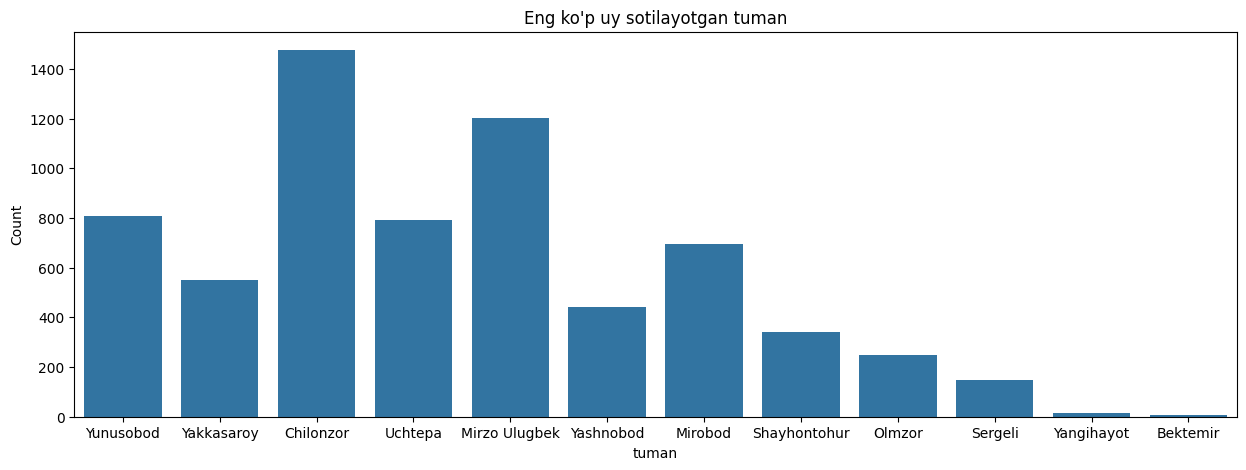

*****************************************************************


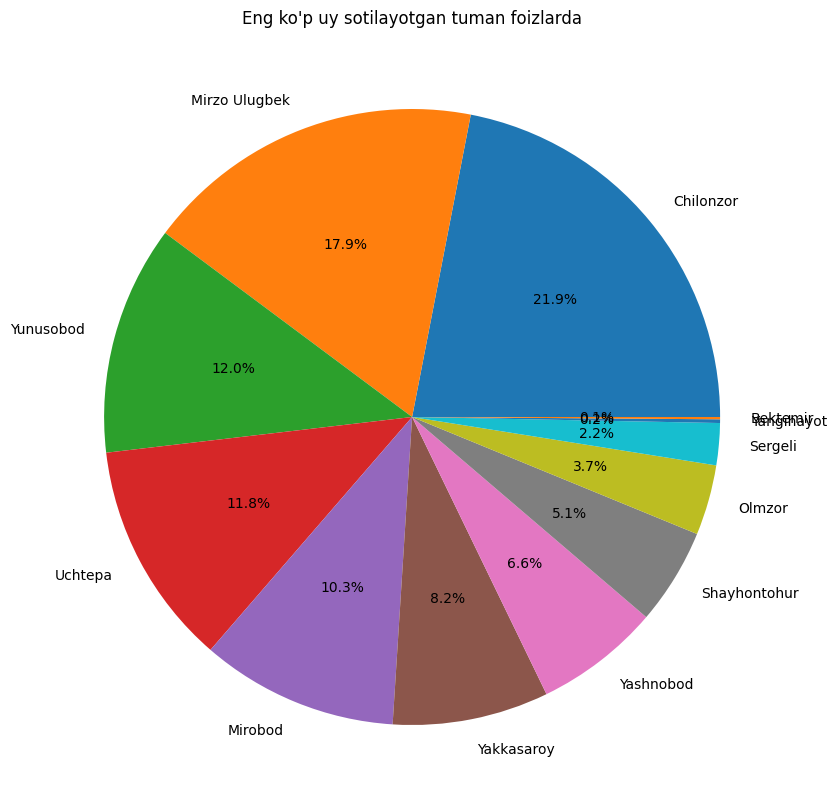

In [13]:
#Categorical Data Visualization

# Bar plot
plt.figure(figsize=(15,5))
sns.countplot(x='district', data=df)
plt.xlabel('tuman')
plt.ylabel('Count')
plt.title("Eng ko'p uy sotilayotgan tuman")
plt.show()

print("*****************************************************************")

# Pie chart
plt.figure(figsize=(10,10))
df['district'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Eng ko'p uy sotilayotgan tuman foizlarda")
plt.ylabel('')
plt.show()


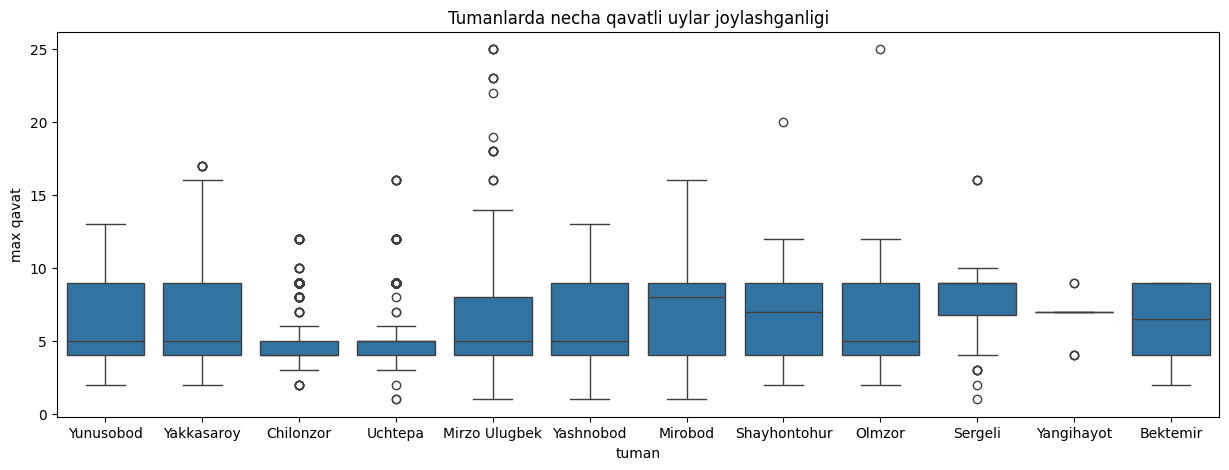

*****************************************************************


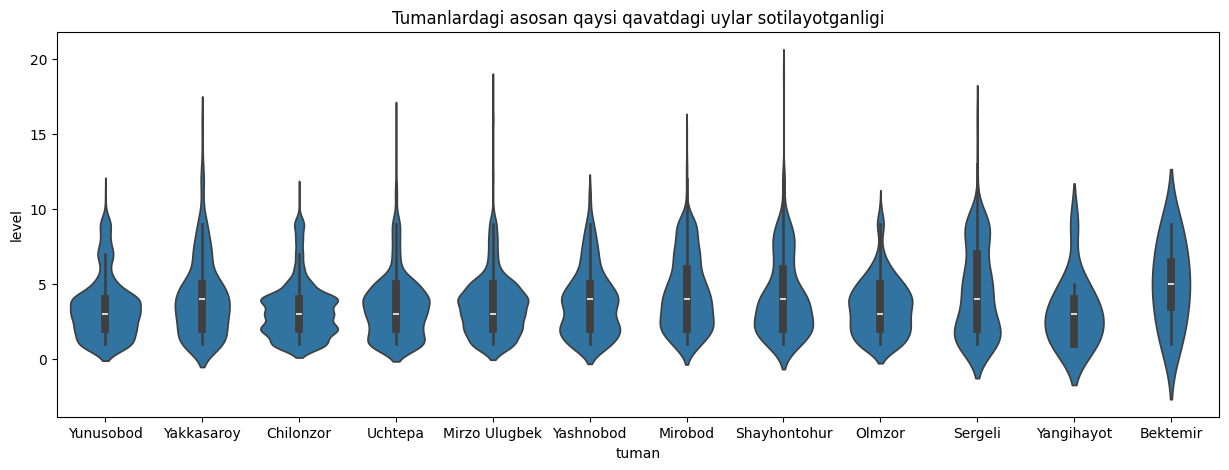

In [14]:
# Distribution Comparison

# Box plot by category
plt.figure(figsize=(15,5))
sns.boxplot(x='district', y='max_levels', data=df)
plt.xlabel('tuman')
plt.ylabel('max qavat')
plt.title('Tumanlarda necha qavatli uylar joylashganligi')
plt.show()

print("*****************************************************************")

# Violin plot by category
plt.figure(figsize=(15,5))
sns.violinplot(x='district', y='level', data=df)
plt.xlabel('tuman')
plt.ylabel('level')
plt.title('Tumanlardagi asosan qaysi qavatdagi uylar sotilayotganligi')
plt.show()


In [15]:
#Interactive Visualization

import plotly.express as px

# Scatter plot
fig = px.scatter(df, x='size', y='price', color='district', title='Narx va hajmiga qarab uy qaysi tumandali')
fig.show()

# Bar plot
# fig = px.bar(df, x='district', y='size', title='Interactive Bar Plot')
# fig.show()


In [16]:
#Grouped Analysis

# Group by a categorical column and calculate summary statistics
grouped_data = df.groupby('district')['size'].agg(['mean', 'median', 'count'])


In [17]:
grouped_data

,mean,median,count
district,,,
Bektemir,62.525000,64.6,8
Chilonzor,62.170779,58.0,1476
Mirobod,94.718865,85.0,696
Mirzo Ulugbek,71.010533,65.0,1201
Olmzor,77.115121,70.0,248
Sergeli,77.575541,75.5,148
Shayhontohur,86.678000,75.0,340
Uchtepa,65.813884,65.0,793
Yakkasaroy,78.651525,68.0,551


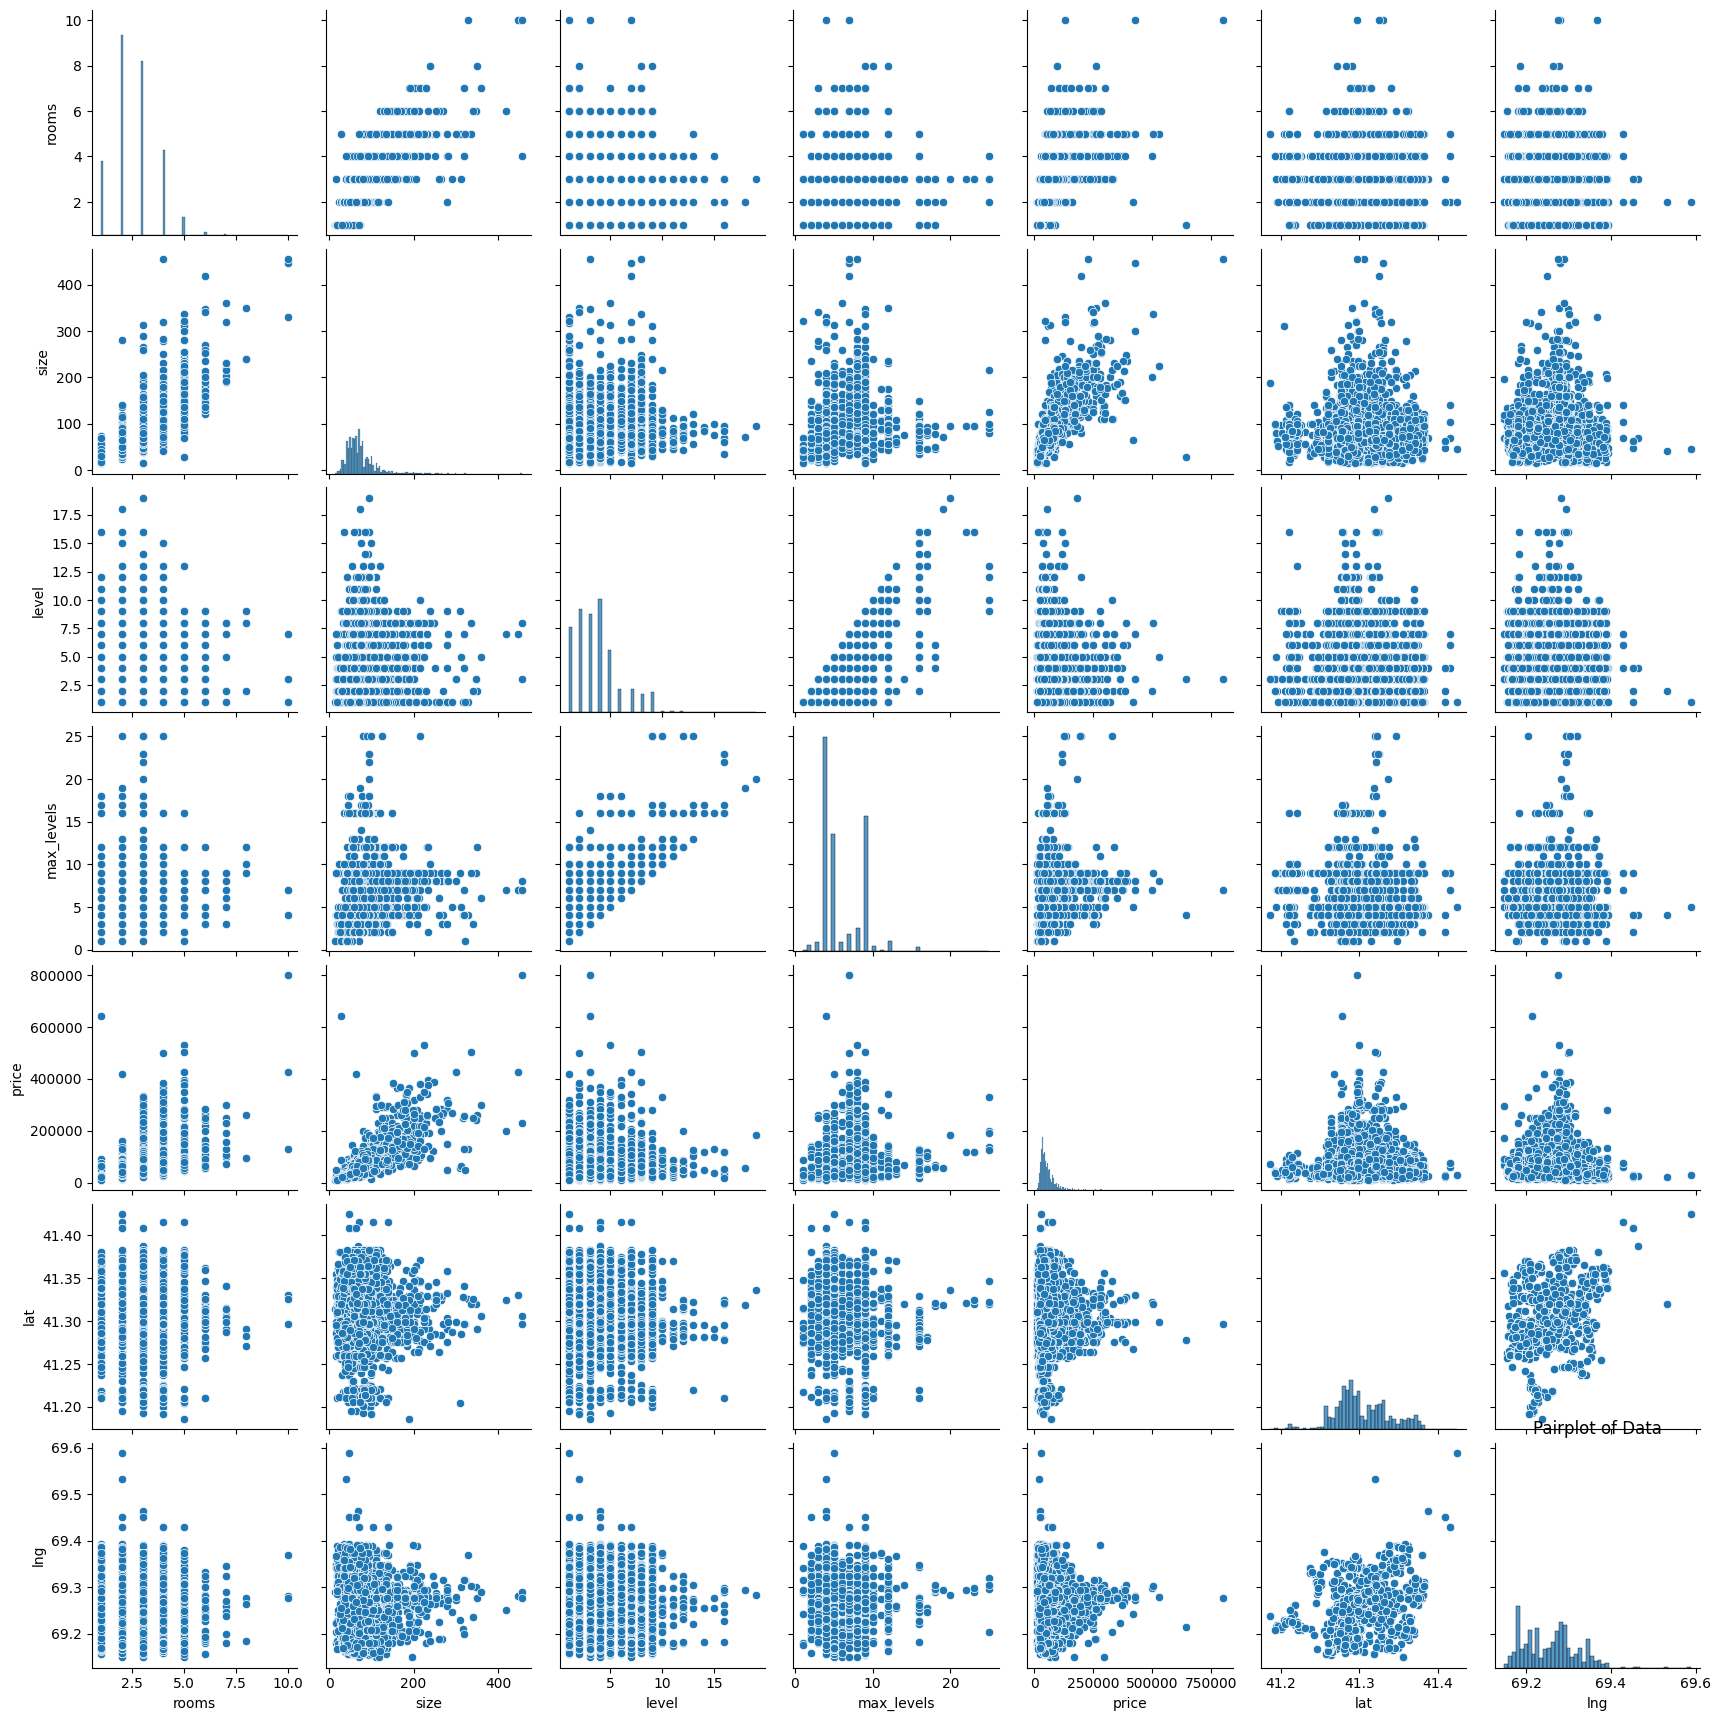

In [18]:
#Multivariate Analysis

# Pairplot for multivariate visualization
sns.pairplot(df)
plt.title('Pairplot of Data')
plt.show()


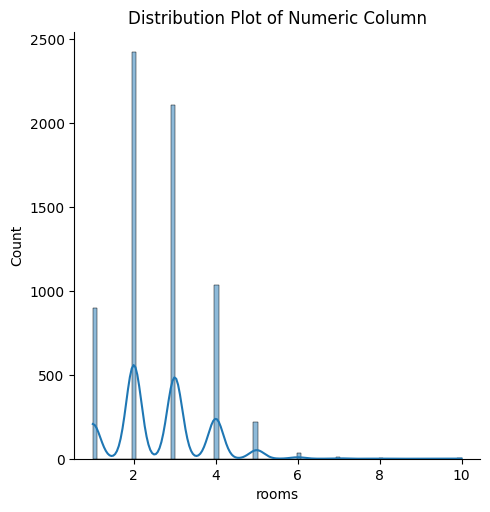

In [19]:
  #Data Distribution Visualization

# Distribution plot
sns.displot(df['rooms'], kde=True)
plt.title('Distribution Plot of Numeric Column')
plt.show()


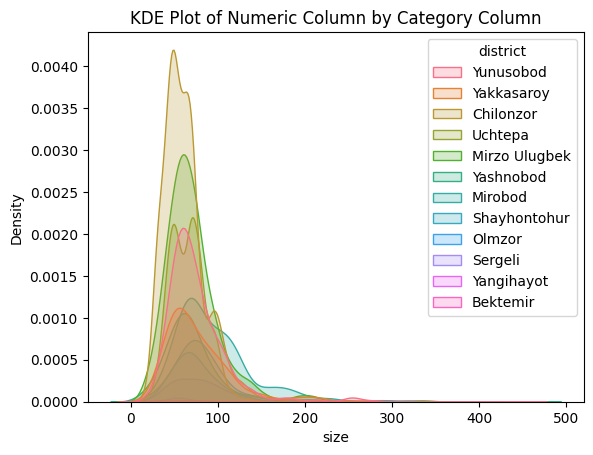

In [20]:
#Distribution Comparison with KDE Plot
# Kernel Density Estimation (KDE) plot
sns.kdeplot(data=df, x='size', hue='district', fill=True)
plt.title('KDE Plot of Numeric Column by Category Column')
plt.show()


In [21]:
# Xulosalar

## Dataset haqida :
1. dataset 7421 ta qator, 9 ta ustundan iborat.
2. ustunlar malumot turi : float64(3), int64(4), object(2).
3. dublicate qatorlar 696 ta
4. null qiymatlar yo'q.
5. bir-biriga nisbatan yuqori korilatsiyaga ega ustunlar :
  * rooms - size 0.78
  * rooms - price 0.55
  * size - price 0.79
  * level - max_levels 0.6
  * lat -lng 0.52

6. chetki qiymatlar mavjud.Masalan,tekshirib ko'rilgani :
  * district ustunini max_levels ustuniga nisbatan
  * price ustunini district ustuniga nisbatan
  * size ustunini price ustuniga nisbatan

## Asosiy xulosalar
1. toshkentdagi sotilayotgan uylar maksimal 10 xonali
2. toshkentdagi sotilayotgan uylar minimal 1 xonali
3. eng ko'p Chilonzor tumanida uylar sotiliyapdi
4. eng kam Bektemir tumanida uylar sotiliyapdi
5. eng ko'p 1 qavatdan 5- qavatgacha bo'lgan uylar sotiliyapdi
6. sotilayotgan uylarning tumanlarga tegishli ulushi(%):
  * Chilonzor 21,9 %
  * Mirzo Ulug'bek 17,9 %
  * Yunusobod 12,0 %
  * Uchtepa 11,8 %
  * Mirobod 10,3 %
  * Yakkasaroy 8,2 %
  * Yashnobod 6,6 %
  * Shayhontohur 5,1 %
  * Olmzor 3,7 %
  * Sergeli 2,2 %
  * Yangihayot 2,2 %
  * Bektemir 2,2 %

7. tumanlarda sotilayotgan uylarni o'rtacha(mean) hajmi :
  * Bektemir 62,52 kv.m
  * Chilonzor 62,17 kv.m
  * Mirobod 94,71 kv.m
  * Mirzo Ulug'bek 71,01 kv.m
  * Olmzor 77,11 kv.m
  * Sergeli 77,57 kv.m
  * Shayhontohur 86,67 kv.m
  * Uchtepa 65,81 kv.m
  * Yakkasaroy 78,65 kv.m
  * Yangihayot 54,93 kv.m
  * Yashnobod 71,00 kv.m
  * Yunusobod 76,12 kv.m

8. eng ko'p 2 xonali uylar sotiliyapdi